In [193]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
import random

#pycaret
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from pycaret.classification import setup

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [194]:
#load csv and print out the dataframe
df = pd.read_csv('term-deposit-marketing-2020.csv')
print(df)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
39995   53    technician   married   tertiary      no      395      no   no   
39996   30    management    single   tertiary      no     3340      no   no   
39997   54         admin  divorced  secondary      no      200      no   no   
39998   34    management   married   tertiary      no     1047      no   no   
39999   38    technician   married  secondary      no     1442     yes   no   

        contact  day month  duration  campaign    y

In [195]:
#perform EDA
print('head:\n', df.head())
print('shape:', df.shape)
print("missing values:\n", df.isnull().sum())
print('info', df.info())
print('describe', df.describe())

head:
    age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign   y  
0  unknown    5   may       261         1  no  
1  unknown    5   may       151         1  no  
2  unknown    5   may        76         1  no  
3  unknown    5   may        92         1  no  
4  unknown    5   may       198         1  no  
shape: (40000, 14)
missing values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64
<

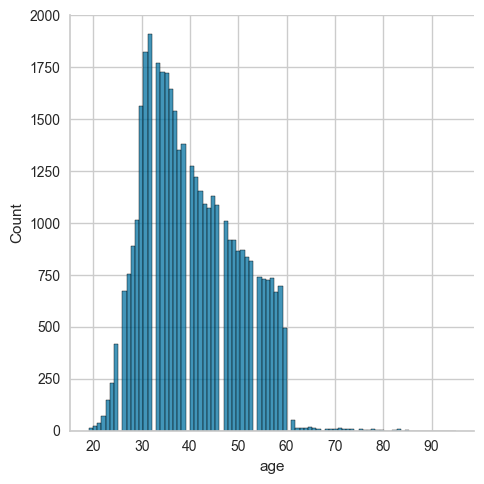

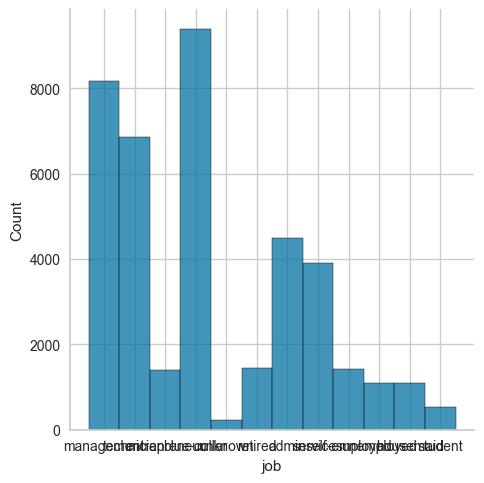

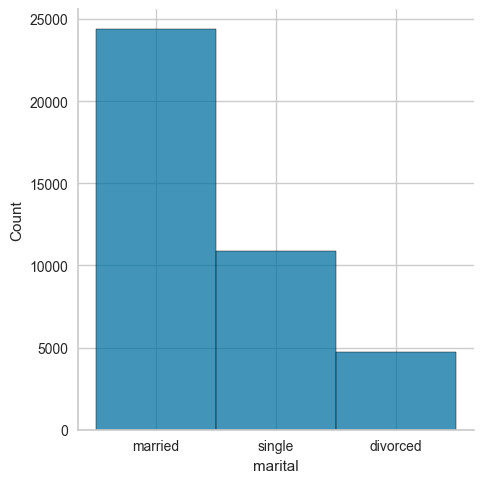

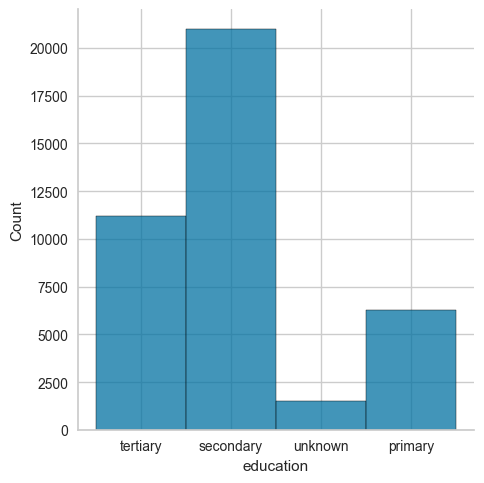

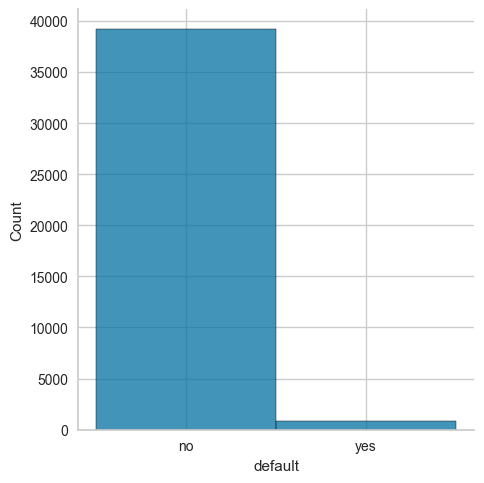

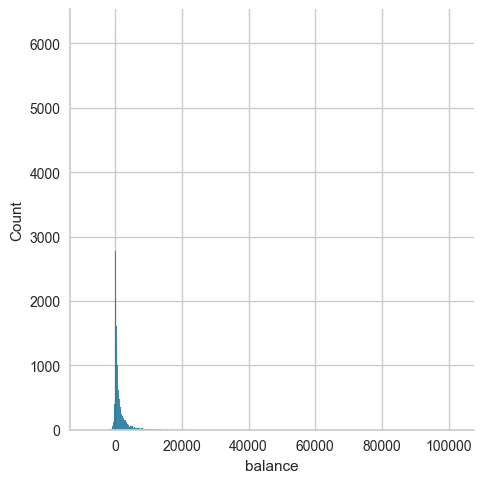

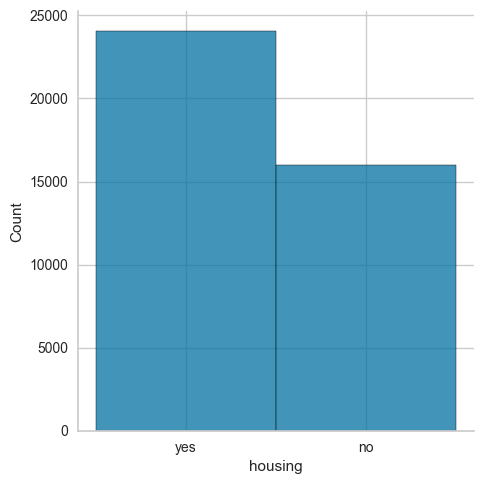

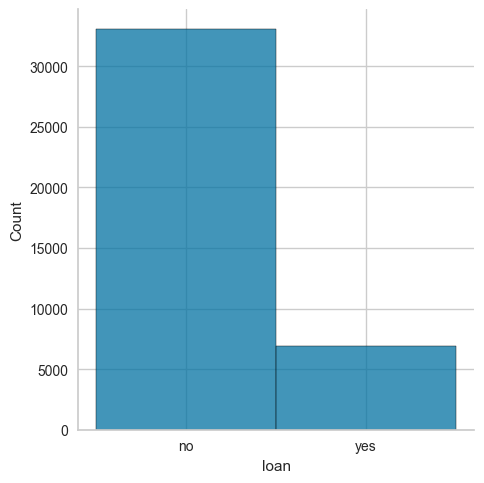

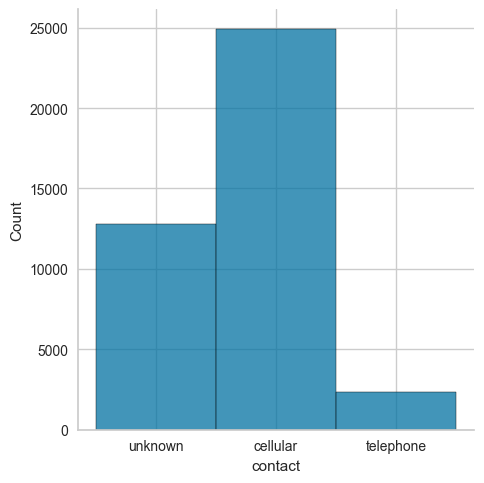

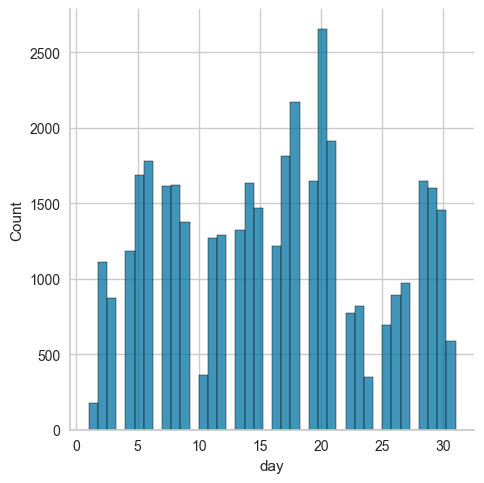

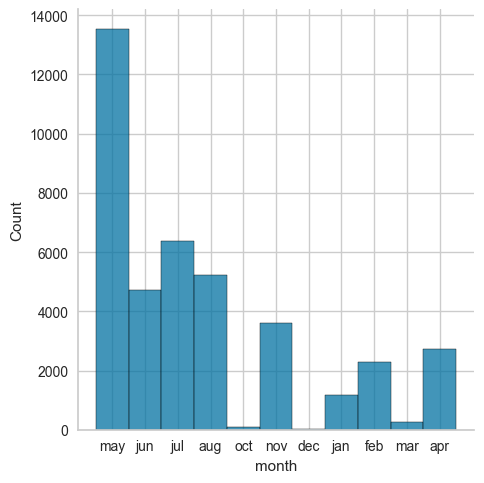

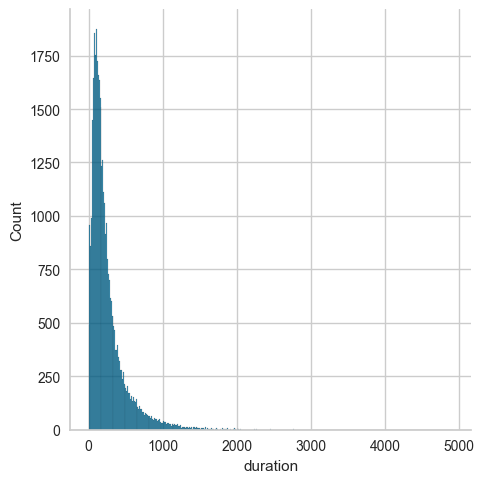

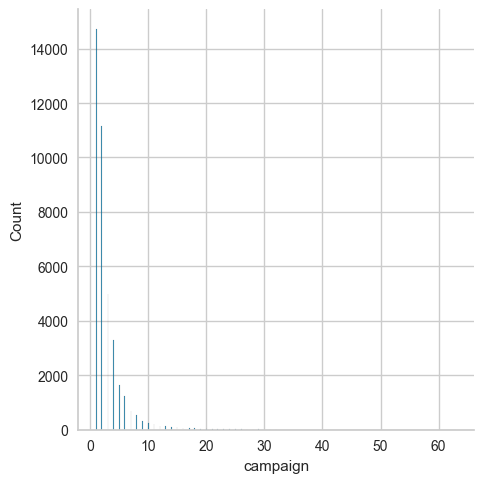

In [196]:
#distribution plot
sns.displot(df, x='age')
sns.displot(df, x='job')
sns.displot(df, x='marital')
sns.displot(df, x='education')
sns.displot(df, x='default')
sns.displot(df, x='balance')
sns.displot(df, x='housing')
sns.displot(df, x='loan')
sns.displot(df, x='contact')
sns.displot(df, x='day')
sns.displot(df, x='month')
sns.displot(df, x='duration')
sns.displot(df, x='campaign')

In [197]:
df.shape

(40000, 14)

In [198]:
#one hot encoding
df_encoded = pd.get_dummies(df, columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'y'])

In [199]:
print('head:\n', df_encoded.head())

head:
    age  balance  day  duration  campaign  job_admin  job_blue-collar  \
0   58     2143    5       261         1      False            False   
1   44       29    5       151         1      False            False   
2   33        2    5        76         1      False            False   
3   47     1506    5        92         1      False             True   
4   33        1    5       198         1      False            False   

   job_entrepreneur  job_housemaid  job_management  ...  month_feb  month_jan  \
0             False          False            True  ...      False      False   
1             False          False           False  ...      False      False   
2              True          False           False  ...      False      False   
3             False          False           False  ...      False      False   
4             False          False           False  ...      False      False   

   month_jul  month_jun  month_mar  month_may  month_nov  month_oct  y_no

In [200]:
pd.get_dummies(df).shape

(40000, 46)

In [201]:
df_encoded.shape

(40000, 46)

In [202]:
df_encoded

,age,balance,day,duration,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,y_no,y_yes
0,58,2143,5,261,1,False,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
1,44,29,5,151,1,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,33,2,5,76,1,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
3,47,1506,5,92,1,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,33,1,5,198,1,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,395,3,107,1,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
39996,30,3340,3,238,3,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
39997,54,200,3,170,1,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
39998,34,1047,3,342,1,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False


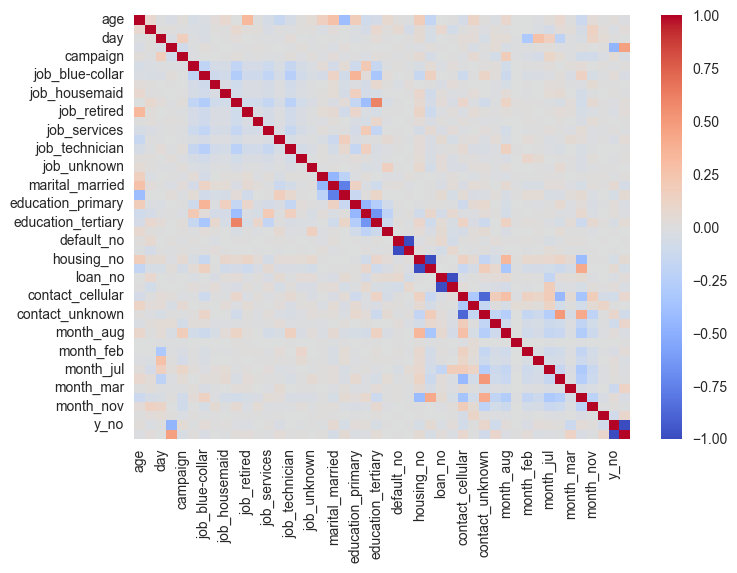

In [203]:
#heatmap
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.show()

In [204]:
#Don't run!!!
#kernel density estimates
##sns.set_style("whitegrid")
##sns.pairplot(df_encoded, hue='y_no')
##plt.show()

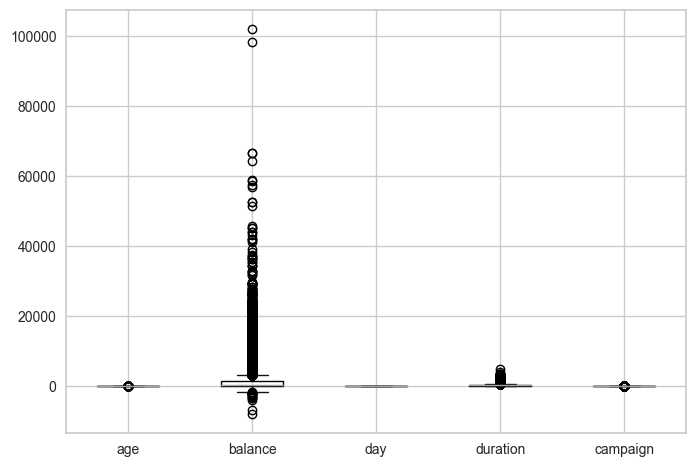

In [205]:
#box plot
data = {'age': df["age"], 'job': df["job"], 'marital': df["marital"], 'education': df["education"], 'default': df["default"], 'balance': df["balance"], 'housing': df["housing"], 'loan': df["loan"], 'contact': df["contact"], 'day': df["day"], 'month': df["month"], 'duration': df["duration"], 'campaign': df["campaign"]}
df_encoded = pd.DataFrame(data)
df_encoded.boxplot()
plt.show()

In [206]:
#removing outliers not needing campaign duration day month

In [207]:
#filtered_df_encoded = df_encoded[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact']]
##from sklearn.model_selection import train_test_split

##x = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact']]
##y = df['y']

##X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.10, random_state=42)
##clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
##models, predictions = clf.fit(X_train, X_test, y_train, y_test)
##models

In [208]:
print(df_encoded)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
39995   53    technician   married   tertiary      no      395      no   no   
39996   30    management    single   tertiary      no     3340      no   no   
39997   54         admin  divorced  secondary      no      200      no   no   
39998   34    management   married   tertiary      no     1047      no   no   
39999   38    technician   married  secondary      no     1442     yes   no   

        contact  day month  duration  campaign  
0 

In [209]:
data = df_encoded[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact']]

In [210]:
#seed = random.randint(1000,9999)
seed = 7000
print(seed)

7000


In [211]:
#run pycaret
##filtered_df_encoded = df_encoded[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact']]
data = df_encoded[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact']]

y = df['y']
train_X, test_X, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=seed)

##clf1 = setup(data = filtered_df_encoded, target = 'Class variable')
clf1 = setup(data = train_X, target = y_train) #'Class variable')

#compare models
best = compare_models()

,Description,Value
0,Session id,5792
1,Target,y
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(28000, 10)"
5,Transformed data shape,"(28000, 28)"
6,Transformed train set shape,"(19600, 28)"
7,Transformed test set shape,"(8400, 28)"
8,Numeric features,2
9,Categorical features,7


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9264,0.6304,0.9264,0.8582,0.8910,0.0000,0.0000,0.9360
ridge,Ridge Classifier,0.9264,0.6286,0.9264,0.8582,0.8910,0.0000,0.0000,0.0510
dummy,Dummy Classifier,0.9264,0.5000,0.9264,0.8582,0.8910,0.0000,0.0000,0.0510
lda,Linear Discriminant Analysis,0.9263,0.6286,0.9263,0.8582,0.8909,-0.0001,-0.0006,0.0640
lightgbm,Light Gradient Boosting Machine,0.9263,0.6212,0.9263,0.9003,0.8934,0.0286,0.0864,1.4900
gbc,Gradient Boosting Classifier,0.9255,0.6375,0.9255,0.8836,0.8916,0.0110,0.0399,0.2680
ada,Ada Boost Classifier,0.9254,0.6379,0.9254,0.8721,0.8911,0.0051,0.0205,0.1400
xgboost,Extreme Gradient Boosting,0.9253,0.5951,0.9253,0.8879,0.8932,0.0307,0.0734,0.1610
knn,K Neighbors Classifier,0.9232,0.5127,0.9232,0.8648,0.8898,-0.0005,0.0009,0.4050
rf,Random Forest Classifier,0.9171,0.5766,0.9171,0.8782,0.8928,0.0632,0.0820,0.2790


In [212]:
train_X

,age,job,marital,education,default,balance,housing,loan,contact
33810,75,retired,divorced,primary,no,18,no,no,cellular
33260,46,management,married,tertiary,no,189,yes,no,cellular
8929,29,blue-collar,single,secondary,no,735,yes,no,unknown
8491,32,management,single,tertiary,no,974,yes,no,unknown
22240,33,management,married,tertiary,no,137,yes,yes,cellular
...,...,...,...,...,...,...,...,...,...
15875,47,technician,married,secondary,no,-18,yes,no,telephone
28821,28,services,single,secondary,no,2992,yes,no,cellular
12385,54,technician,divorced,secondary,no,255,yes,no,unknown
31465,39,technician,divorced,secondary,no,688,yes,yes,cellular


In [213]:
df_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1


In [214]:
#Logistic Regression
#from sklearn.linear_model import LogisticRegression

df_frame = pd.get_dummies(df, columns = ['job', 'marital', 'education', 'default', 'housing', 'loan'])
df_frame = df_frame.drop('contact', axis=1)
df_frame = df_frame.drop('day', axis=1)
df_frame = df_frame.drop('month', axis=1)
df_frame = df_frame.drop('duration', axis=1)
df_frame = df_frame.drop('y', axis=1)

LR = LogisticRegression(C=1.0, solver='liblinear', random_state=seed)
LR.fit(df_frame, y)
LR
#print(df_frame)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7000, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [215]:
#predict using training set
X_training, X_testing, y_training, y_testing = train_test_split(df_frame, y, test_size=0.3, random_state=seed)
y_ing = df['y']

yhat = LR.predict(X_testing)
yhat
yhat_prob = LR.predict_log_proba(X_testing)
yhat_prob

array([[-0.04167847, -3.19853744],
       [-0.06743198, -2.73016243],
       [-0.11366733, -2.23077465],
       ...,
       [-0.11935154, -2.18476435],
       [-0.05056631, -3.00964629],
       [-0.05588513, -2.91226946]])

In [216]:
#accuracy score-logistic regression
#Create a RandomUnderSampler object
rus = RandomUnderSampler(random_state=seed, sampling_strategy = 'majority')

#Balancing the data
X_resampled, y_resampled = rus.fit_resample(X_training, y_training)

#(1)resampled train data for training(fit a model with the sampled version of the training data)
LR = LogisticRegression(C=1.0, solver='liblinear', random_state=seed)
LR.fit(X_resampled, y_resampled)

#(2)another prediction with new model--obtain new y predictions
##X_trainings, X_testings, y_trainings, y_testings = train_test_split(X_resampled, y_X_resampled, test_size=0.3, random_state=42)
##y_ings = y_X_resampled

yhats = LR.predict(X_testing)
##yhats
yhat_probs = LR.predict_log_proba(X_testing)

##logreg = LogisticRegression()
##logreg.fit(X_trainings, y_trainings)
##y_preds = logreg.predict(X_testings)

acc = accuracy_score(y_testing, yhats)
print("accuracy", acc*100)
#print('Resampled dataset shape %s' % y_X_resampled)
##print(X_resampled.value_counts())
#print(y_X_resampled.value_counts())
#print(y_training.value_counts())
#print(classification_report(y_X_resampled, y_pred))#print(classification_report(y_testing, y_pred))
#(3)classification report
print(classification_report(y_testing, yhats))

accuracy 57.25
              precision    recall  f1-score   support

          no       0.95      0.57      0.71     11166
         yes       0.10      0.62      0.17       834

    accuracy                           0.57     12000
   macro avg       0.53      0.60      0.44     12000
weighted avg       0.89      0.57      0.67     12000



In [217]:
#Logistic Regression SMOTE
smote = SMOTE(sampling_strategy='minority') 
X_training_sm, y_training_sm = smote.fit_resample(X_training, y_training)
y_training_sm.value_counts()
predictions = LR.predict(X_testing)
acclr = accuracy_score(y_testing, predictions)
print("accuracy", acclr*100)
print(classification_report(y_testing, predictions))
print(y_training.value_counts())
print(y_testing.value_counts())

accuracy 57.25
              precision    recall  f1-score   support

          no       0.95      0.57      0.71     11166
         yes       0.10      0.62      0.17       834

    accuracy                           0.57     12000
   macro avg       0.53      0.60      0.44     12000
weighted avg       0.89      0.57      0.67     12000

y
no     25938
yes     2062
Name: count, dtype: int64
y
no     11166
yes      834
Name: count, dtype: int64


In [218]:
#Logistic Regression SMOTE-Tomek
## With SMOTE-Tomek Links method
# Define model
modelLRst=LR
# Define SMOTE-Tomek Links
resampleLRst=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
# Define pipeline
pipeline=Pipeline(steps=[('r', resampleLRst), ('m', modelLRst)])
# Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores = cross_validate(pipeline, X_resampled, y_resampled, scoring=scoring, cv=cv, n_jobs=-1)# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))

Mean Accuracy: 0.5494
Mean Precision: 0.5703
Mean Recall: 0.5494


In [219]:
#Logistic Regression SMOTE-ENN
##Using SMOTE-ENN to balance the data
#Define model
modelLRenn=LR
#Define SMOTE-ENN
resampleLRenn=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
#Define pipeline
pipeline=Pipeline(steps=[('r', resampleLRenn), ('m', modelLRenn)])
#Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores = cross_validate(pipeline, X_resampled, y_resampled, scoring=scoring, cv=cv, n_jobs=-1)

# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))

Mean Accuracy: 0.5613
Mean Precision: 0.5632
Mean Recall: 0.5613


In [220]:
#Logistic Regression SMOTE-Tomek
#Smote-Tomek
# Generate imbalanced dataset
#X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# Split the data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTETomek
smote_tomek = SMOTETomek(random_state=seed)
X_resampled_tomek, y_resampled_tomek = smote_tomek.fit_resample(X_training, y_training)

# Train a classifier
clf = RandomForestClassifier(random_state=seed)
clf.fit(X_resampled_tomek, y_resampled_tomek)

# Predict on test set
y_pred = clf.predict(X_testing)

# Print classification report
print(classification_report(y_testing, y_pred))

              precision    recall  f1-score   support

          no       0.93      0.98      0.96     11166
         yes       0.21      0.07      0.10       834

    accuracy                           0.92     12000
   macro avg       0.57      0.52      0.53     12000
weighted avg       0.88      0.92      0.90     12000



In [221]:
#Logistic Regression SMOTE-ENN
smtenn = SMOTEENN(random_state=seed)
X_trainingenn, y_trainingenn = smtenn.fit_resample(X_training, y_training)
#X_train=pd.DataFrame(X_train,columns = X.columns)
#X_test=pd.DataFrame(X_test,columns = X.columns)

log_reg_smote_ENN = LogisticRegression()

log_reg_smote_ENN.fit(X_trainingenn,y_trainingenn)

# Predict on test set
y_predenn = log_reg_smote_ENN.predict(X_testing)

# Print classification report
print(classification_report(y_testing, y_predenn))

#evaluate_model(log_reg_smote_ENN,X_trainingenn,y_trainingenn,X_testing,y_testing,fit=True)

              precision    recall  f1-score   support

          no       0.93      0.89      0.91     11166
         yes       0.08      0.13      0.10       834

    accuracy                           0.84     12000
   macro avg       0.51      0.51      0.51     12000
weighted avg       0.87      0.84      0.86     12000



In [222]:
#Adaboost Classifier-random undersampler
##X_tn, X_tt, y_tn, y_tt = train_test_split(df_frame, y, test_size=0.3)

#Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
#Train Adaboost Classifer
model = abc.fit(X_trainingenn, y_trainingenn)##model = abc.fit(X_tn, y_tn)

#Predict the response for test dataset
y_preds_abc = model.predict(X_testing)##y_pred = model.predict(X_tt)

#Model Accuracy-Classification report
print("Accuracy:", metrics.accuracy_score(y_testing, y_preds_abc))##print("Accuracy:", metrics.accuracy_score(y_tt, y_pred))
print(classification_report(y_testing, y_preds_abc))##print(classification_report(y_tt, y_pred))

Accuracy: 0.91225
              precision    recall  f1-score   support

          no       0.94      0.97      0.95     11166
         yes       0.22      0.10      0.14       834

    accuracy                           0.91     12000
   macro avg       0.58      0.54      0.55     12000
weighted avg       0.89      0.91      0.90     12000



In [223]:
#Adaboost Classifier SMOTE-Tomek Links method
# Define model
modelABCst=abc
# Define SMOTE-Tomek Links
resampleABCst=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
# Define pipeline
pipeline=Pipeline(steps=[('r', resampleABCst), ('m', modelABCst)])
# Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores = cross_validate(pipeline, X_resampled, y_resampled, scoring=scoring, cv=cv, n_jobs=-1)# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))

Mean Accuracy: 0.5645
Mean Precision: 0.5771
Mean Recall: 0.5645


In [224]:
#Don't run!!!
#Smote-enn Adaboost Classifier
#Define model
# modelABCenn=abc
#Define SMOTE-ENN
# resampleABCenn=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
#Define pipeline
# pipeline=Pipeline(steps=[('r', resampleABCenn), ('m', modelABCenn)])
#Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
# cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#Evaluate model
# scoring=['accuracy','precision_macro','recall_macro']
# scores = cross_validate(pipeline, X_training, y_training, scoring=scoring, cv=cv, n_jobs=-1)

# summarize performance
# print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
# print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
# print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))

In [225]:
#Ada Boosting Classifier SMOTE-Tomek
# Apply SMOTETomek
smote_tomek = SMOTETomek(random_state=seed)
X_resampled_tomek, y_resampled_tomek = smote_tomek.fit_resample(X_training, y_training)

# Train a classifier
clf = RandomForestClassifier(random_state=seed)
clf.fit(X_resampled_tomek, y_resampled_tomek)

# Predict on test set
y_pred = clf.predict(X_testing)

# Print classification report
print(classification_report(y_testing, y_pred))

              precision    recall  f1-score   support

          no       0.93      0.98      0.96     11166
         yes       0.21      0.07      0.10       834

    accuracy                           0.92     12000
   macro avg       0.57      0.52      0.53     12000
weighted avg       0.88      0.92      0.90     12000



In [226]:
#Ada Boosting Classifier SmoteENN
smtenn = SMOTEENN(random_state=seed)
X_trainingenn, y_trainingenn = smtenn.fit_resample(X_training, y_training)
#X_train=pd.DataFrame(X_train,columns = X.columns)
#X_test=pd.DataFrame(X_test,columns = X.columns)

abc_smote_ENN = AdaBoostClassifier()

abc_smote_ENN.fit(X_trainingenn,y_trainingenn)

# Predict on test set
y_predenn = abc_smote_ENN.predict(X_testing)

# Print classification report
print(classification_report(y_testing, y_predenn))

              precision    recall  f1-score   support

          no       0.94      0.97      0.95     11166
         yes       0.22      0.10      0.14       834

    accuracy                           0.91     12000
   macro avg       0.58      0.54      0.55     12000
weighted avg       0.89      0.91      0.90     12000



In [227]:
#Gradient Boosting Classifier
#XX, yy = load_digits(return_X_y=True)
#training_X, testing_X, training_y, testing_y = train_test_split(XX, yy, test_size = 0.3, random_state = seed)

gbc = GradientBoostingClassifier(n_estimators=300,
                                learning_rate=0.05,
                                random_state=100,
                                max_features=5)
gbc.fit(X_resampled, y_resampled)###gbc.fit(training_X, training_y)
pred_ys = gbc.predict(X_testing)###pred_y = gbc.predict(testing_X)
a = accuracy_score(y_testing, pred_ys)###a = accuracy_score(testing_y, pred_y)
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(a))
print(classification_report(y_testing, pred_ys))###print(classification_report(testing_y, pred_y))

Gradient Boosting Classifier accuracy is : 0.62
              precision    recall  f1-score   support

          no       0.95      0.62      0.75     11166
         yes       0.11      0.61      0.18       834

    accuracy                           0.62     12000
   macro avg       0.53      0.61      0.47     12000
weighted avg       0.90      0.62      0.71     12000



In [228]:
#Gradient Boosting Classifier SMOTE
smote = SMOTE(sampling_strategy='minority') 
X_training_smote, y_training_smote = smote.fit_resample(X_training, y_training)
y_training_smote.value_counts()

gbc_smote = GradientBoostingClassifier(n_estimators=5,
                                learning_rate=0.5,
                                random_state=100,
                                max_features=5)
gbc_smote.fit(X_training_smote, y_training_smote)

predictionsGBC = gbc_smote.predict(X_testing)
accGBC = accuracy_score(y_testing, predictionsGBC)
print("accuracy", accGBC*100)
print(classification_report(y_testing, predictionsGBC))

accuracy 83.14166666666667
              precision    recall  f1-score   support

          no       0.93      0.88      0.91     11166
         yes       0.09      0.15      0.11       834

    accuracy                           0.83     12000
   macro avg       0.51      0.52      0.51     12000
weighted avg       0.87      0.83      0.85     12000



In [229]:
#Gradient Boosting Classifier With SMOTE-Tomek Links method
# Define model
modelGBCst=gbc
# Define SMOTE-Tomek Links
resampleGBCst=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
# Define pipeline
pipeline=Pipeline(steps=[('r', resampleGBCst), ('m', modelGBCst)])
# Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores = cross_validate(pipeline, X_resampled, y_resampled, scoring=scoring, cv=cv, n_jobs=-1)# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))

Mean Accuracy: 0.5702
Mean Precision: 0.5826
Mean Recall: 0.5702


In [230]:
#Gradient Boosting Classifier with SMOTE-ENN
#Define model
modelGBCenn=gbc
#Define SMOTE-ENN
resampleGBCenn=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
#Define pipeline
pipeline=Pipeline(steps=[('r', resampleGBCenn), ('m', modelGBCenn)])
#Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores = cross_validate(pipeline, X_resampled, y_resampled, scoring=scoring, cv=cv, n_jobs=-1)

# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))

Mean Accuracy: 0.5650
Mean Precision: 0.5656
Mean Recall: 0.5650


In [231]:
#Gradient Boosting Classifier SMOTE-Tomek
# Apply SMOTETomek
smote_tomek_rf = SMOTETomek(random_state=seed)
X_resampled_tomek_rf, y_resampled_tomek_rf = smote_tomek_rf.fit_resample(X_training_smote, y_training_smote)

# Train a classifier
clf = RandomForestClassifier(random_state=seed)
clf.fit(X_resampled_tomek_rf, y_resampled_tomek_rf)

# Predict on test set
y_pred = clf.predict(X_testing)

# Print classification report
print(classification_report(y_testing, y_pred))

              precision    recall  f1-score   support

          no       0.93      0.98      0.96     11166
         yes       0.20      0.07      0.10       834

    accuracy                           0.92     12000
   macro avg       0.57      0.52      0.53     12000
weighted avg       0.88      0.92      0.90     12000



In [232]:
#Gradient Boosting Classifier SmoteENN
smtenn = SMOTEENN(random_state=seed)
X_trainingenn, y_trainingenn = smtenn.fit_resample(X_training, y_training)
#X_train=pd.DataFrame(X_train,columns = X.columns)
#X_test=pd.DataFrame(X_test,columns = X.columns)

gbc_smote_ENN = GradientBoostingClassifier()

gbc_smote_ENN.fit(X_trainingenn,y_trainingenn)

# Predict on test set
y_predenn = gbc_smote_ENN.predict(X_testing)

# Print classification report
print(classification_report(y_testing, y_predenn))

              precision    recall  f1-score   support

          no       0.94      0.98      0.96     11166
         yes       0.25      0.09      0.14       834

    accuracy                           0.92     12000
   macro avg       0.59      0.54      0.55     12000
weighted avg       0.89      0.92      0.90     12000



Confusion matrix

 [[11126    40]
 [  818    16]]

True Positives(TP) =  11126

True Negatives(TN) =  16

False Positives(FP) =  40

False Negatives(FN) =  818


<Axes: >

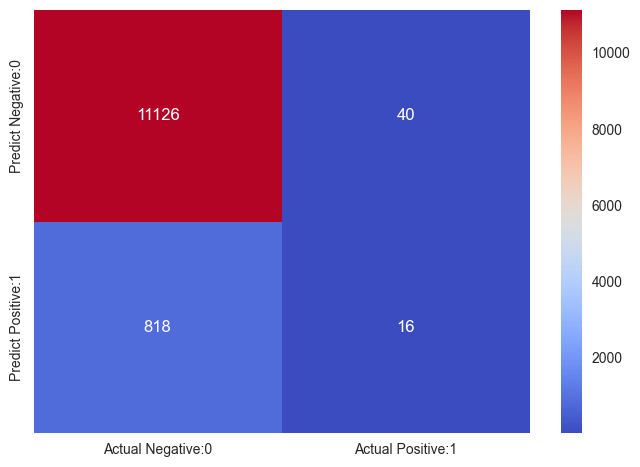

In [233]:
#confusion matrix
bagging_clf = BaggingClassifier(estimator=RandomForestClassifier(),
                        n_estimators=10, random_state=seed).fit(X_training, y_training)
y_hat = bagging_clf.predict(X_testing)

cm = confusion_matrix(y_test, y_hat)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative:0', 'Actual Positive:1'], index=['Predict Negative:0', 'Predict Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='coolwarm')

In [234]:
#Don't Run
#import lazypredict
#from lazypredict.Supervised import LazyClassifier

#x = df_encoded[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign']]
#y = df['y']

#X_training, X_testing, y_training, y_testing = train_test_split(x, y, test_size=0.3, random_state=seed)
#clf = LazyClassifier(verbose=1, ignore_warnings=True, custom_metric=None)
#models, predictions = clf.fit(X_training, X_testing, y_training, y_testing)
#models

In [235]:
train_X, test_X, y_train, y_test

(       age          job   marital  education default  balance housing loan  \
 33810   75      retired  divorced    primary      no       18      no   no   
 33260   46   management   married   tertiary      no      189     yes   no   
 8929    29  blue-collar    single  secondary      no      735     yes   no   
 8491    32   management    single   tertiary      no      974     yes   no   
 22240   33   management   married   tertiary      no      137     yes  yes   
 ...    ...          ...       ...        ...     ...      ...     ...  ...   
 15875   47   technician   married  secondary      no      -18     yes   no   
 28821   28     services    single  secondary      no     2992     yes   no   
 12385   54   technician  divorced  secondary      no      255     yes   no   
 31465   39   technician  divorced  secondary      no      688     yes  yes   
 3391    26   technician    single   tertiary      no      192     yes   no   
 
          contact  
 33810   cellular  
 33260   c

In [236]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


In [237]:
df_frame_2 = pd.get_dummies(df, columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month'])
df_frame_2 = df_frame_2.drop('y', axis=1)

In [238]:
df_y = df['y']

In [239]:
df_frame_2.head()

,age,balance,day,duration,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,58,2143,5,261,1,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,44,29,5,151,1,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,33,2,5,76,1,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,47,1506,5,92,1,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,33,1,5,198,1,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [240]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_frame_2, df_y, test_size=0.3, random_state=seed)

In [241]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_2, y_train_2)

#Predict the response for test dataset
y_pred = clf.predict(X_test_2)

print("Accuracy:",metrics.accuracy_score(y_test_2, y_pred))
print(classification_report(y_test_2, y_pred))

Accuracy: 0.9164166666666667
              precision    recall  f1-score   support

          no       0.96      0.95      0.95     11166
         yes       0.41      0.48      0.44       834

    accuracy                           0.92     12000
   macro avg       0.69      0.71      0.70     12000
weighted avg       0.92      0.92      0.92     12000



In [242]:
bnb = BernoulliNB(binarize=0.0)
model = bnb.fit(X_train_2, y_train_2)
y_pred = bnb.predict(X_test_2)

print("Accuracy:",metrics.accuracy_score(y_test_2, y_pred))
print(classification_report(y_test_2, y_pred))

Accuracy: 0.92775
              precision    recall  f1-score   support

          no       0.94      0.99      0.96     11166
         yes       0.42      0.10      0.16       834

    accuracy                           0.93     12000
   macro avg       0.68      0.54      0.56     12000
weighted avg       0.90      0.93      0.91     12000



In [243]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train_2, y_train_2)

#Predict the response for test dataset
y_pred = model.predict(X_test_2)

print("Accuracy:",metrics.accuracy_score(y_test_2, y_pred))
print(classification_report(y_test_2, y_pred))

Accuracy: 0.9340833333333334
              precision    recall  f1-score   support

          no       0.95      0.98      0.97     11166
         yes       0.54      0.34      0.42       834

    accuracy                           0.93     12000
   macro avg       0.75      0.66      0.69     12000
weighted avg       0.92      0.93      0.93     12000



In [244]:
y_train_2

33810    no
33260    no
8929     no
8491     no
22240    no
         ..
15875    no
28821    no
12385    no
31465    no
3391     no
Name: y, Length: 28000, dtype: object

In [245]:
y_train_2_new = y_train_2.replace('yes', True)

In [246]:
y_train_2_new = y_train_2_new.replace('no', False)

In [247]:
y_train_2_new

33810    False
33260    False
8929     False
8491     False
22240    False
         ...  
15875    False
28821    False
12385    False
31465    False
3391     False
Name: y, Length: 28000, dtype: bool

In [248]:
y_test_2_new = y_test_2.replace('yes', True)
y_test_2_new = y_test_2_new.replace('no', False)

Accuracy: 93.94%
              precision    recall  f1-score   support

       False       0.96      0.97      0.97     11166
        True       0.58      0.47      0.52       834

    accuracy                           0.94     12000
   macro avg       0.77      0.72      0.74     12000
weighted avg       0.93      0.94      0.94     12000

Confusion matrix

 [[10881   285]
 [  442   392]]

True Positives(TP) =  10881

True Negatives(TN) =  392

False Positives(FP) =  285

False Negatives(FN) =  442


<Axes: >

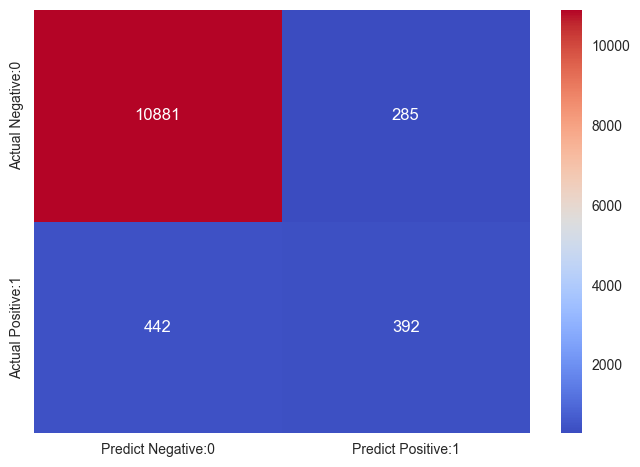

In [249]:
#XGBClassifier
model = XGBClassifier()
model.fit(X_train_2, y_train_2_new)
y_pred = model.predict(X_test_2)

accuracy = accuracy_score(y_test_2_new, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test_2_new, y_pred))

cm = confusion_matrix(y_test_2_new, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0', 'Predict Positive:1'], index=['Actual Negative:0', 'Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='coolwarm')

Accuracy: 93.98%
              precision    recall  f1-score   support

       False       0.95      0.99      0.97     11166
        True       0.66      0.28      0.39       834

    accuracy                           0.94     12000
   macro avg       0.80      0.63      0.68     12000
weighted avg       0.93      0.94      0.93     12000

Confusion matrix

 [[11047   119]
 [  603   231]]

True Positives(TP) =  11047

True Negatives(TN) =  231

False Positives(FP) =  119

False Negatives(FN) =  603


<Axes: >

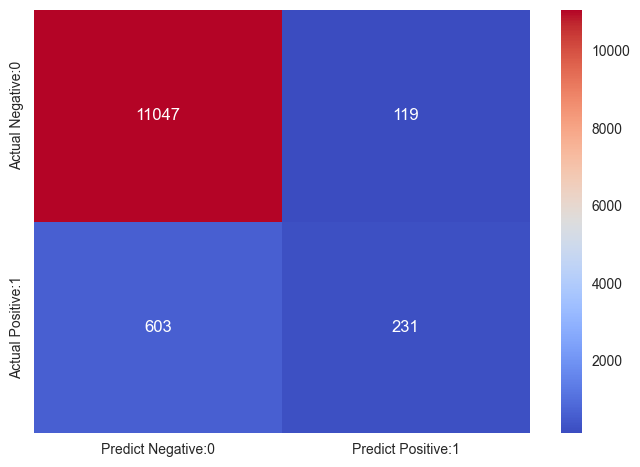

In [250]:
#Bagging classifier
bagging_clf = BaggingClassifier(estimator=RandomForestClassifier(),
                        n_estimators=10, random_state=seed).fit(X_train_2, y_train_2_new)

bagging_clf.fit(X_train_2, y_train_2_new)
y_pred = bagging_clf.predict(X_test_2)

accuracy = accuracy_score(y_test_2_new, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test_2_new, y_pred))
#confusion matrix
cm = confusion_matrix(y_test_2_new, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0', 'Predict Positive:1'], index=['Actual Negative:0', 'Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='coolwarm')

Accuracy: 93.41%
              precision    recall  f1-score   support

       False       0.95      0.98      0.97     11166
        True       0.54      0.34      0.42       834

    accuracy                           0.93     12000
   macro avg       0.75      0.66      0.69     12000
weighted avg       0.92      0.93      0.93     12000

Confusion matrix

 [[10927   239]
 [  552   282]]

True Positives(TP) =  10927

True Negatives(TN) =  282

False Positives(FP) =  239

False Negatives(FN) =  552


<Axes: >

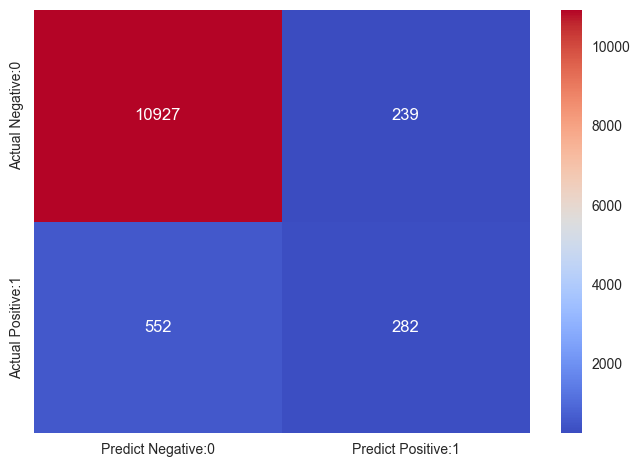

In [251]:
#AdaBoost Classifier
model_ada = AdaBoostClassifier()
model_ada.fit(X_train_2, y_train_2_new)
y_pred = model_ada.predict(X_test_2)

accuracy = accuracy_score(y_test_2_new, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test_2_new, y_pred))

#confusion matrix
cm = confusion_matrix(y_test_2_new, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0', 'Predict Positive:1'], index=['Actual Negative:0', 'Actual Positive:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='coolwarm')

# Conclusion

Three classification reports and confusion matrices were calculated. The classification reports and matrices found are for the XGBClassifier, Bagging Classifier, and AdaBoost Classifier. All three have high recall for the false response. The XBGClassifier has the highest recall in the response for true, and is superior or the best performing model.

In [252]:
df_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1


In [253]:
df_encoded['y'] = df['y']
df_encoded_new = pd.get_dummies(df_encoded, columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'y'])

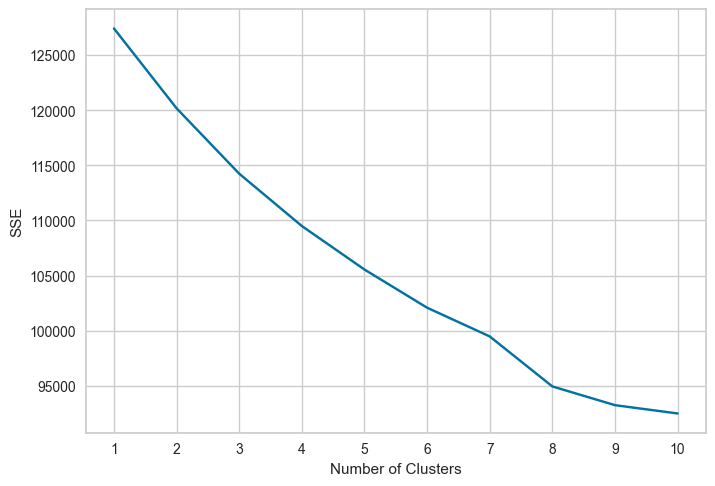

       age  balance  day  duration  campaign  job_admin  job_blue-collar  \
83      59     2343    5      1042         1       True            False   
86      56       45    5      1467         1       True            False   
87      41     1270    5      1389         1      False            False   
129     55     2476    5       579         1      False            False   
168     54      184    5       673         2       True            False   
...    ...      ...  ...       ...       ...        ...              ...   
39986   29      637    3       340         1      False            False   
39988   55     2383    3       591         2      False            False   
39990   26     1231    3       385         2      False            False   
39996   30     3340    3       238         3      False            False   
39997   54      200    3       170         1       True            False   

       job_entrepreneur  job_housemaid  job_management  ...  month_jan  \
83           

In [254]:
#the elbow method
df_filtered = df_encoded_new.loc[df_encoded_new['y_yes'] == True]

#create scaled DataFrame where each variable has mean of 0 and standard dev of 1
scaled_df = StandardScaler().fit_transform(df_filtered)

#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

#Initialize KMeans
#kmeans = KMeans(n_clusters=8)
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=8, n_init=10, random_state=1)

#df_filtered = df_encoded.query('y == no')
##df_filtered = df_encoded.loc[df_encoded['y_yes'] == True]

#df_filtered = pd.get_dummies(df_encoded, columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month'])

#Fit the model
kmeans.fit(df_filtered)

#Get cluster labels
labels = kmeans.labels_

#Add labels to dataframe
df_filtered['cluster'] = labels

print(df_filtered)
##print(df_filtered.head())
#Visualize the clusters
#plt.scatter(df_filtered['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month'], df_filtered['y'], c=df_filtered['cluster'])
#plt.show()

In [255]:
#pca method
#sample data
X = np.array(df_filtered)

# Create a PCA object
pca = PCA(n_components=2)

# Fit the PCA model to the data
pca.fit(X)

# Transform the data to the new coordinate system
X_pca = pca.transform(X)

print(X_pca)

[[  752.25185879   363.74832413]
 [-1548.3601508    774.38025485]
 [ -322.90124619   704.03859766]
 ...
 [ -355.63176337  -300.18302031]
 [ 1754.24693343  -434.0021085 ]
 [-1385.25958701  -521.62533389]]


In [256]:
df_filtered['cluster'].info()

<class 'pandas.core.series.Series'>
Index: 2896 entries, 83 to 39997
Series name: cluster
Non-Null Count  Dtype
--------------  -----
2896 non-null   int32
dtypes: int32(1)
memory usage: 33.9 KB


In [257]:
df_pca = pd.DataFrame.from_records(X_pca)
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2896 entries, 0 to 2895
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2896 non-null   float64
 1   1       2896 non-null   float64
dtypes: float64(2)
memory usage: 45.4 KB


In [258]:
X_pca.shape

(2896, 2)

In [259]:
df_pca[0]

0        752.251859
1      -1548.360151
2       -322.901246
3        888.141075
4      -1404.402197
           ...     
2891    -949.338374
2892     795.067904
2893    -355.631763
2894    1754.246933
2895   -1385.259587
Name: 0, Length: 2896, dtype: float64

In [260]:
df_pca.head()

,0,1
0,752.251859,363.748324
1,-1548.360151,774.380255
2,-322.901246,704.038598
3,888.141075,-98.410902
4,-1404.402197,-18.734774


In [261]:
pcaX = df_pca[0]

In [262]:
pcaY = df_pca[1]

In [263]:
c = df_filtered['cluster']

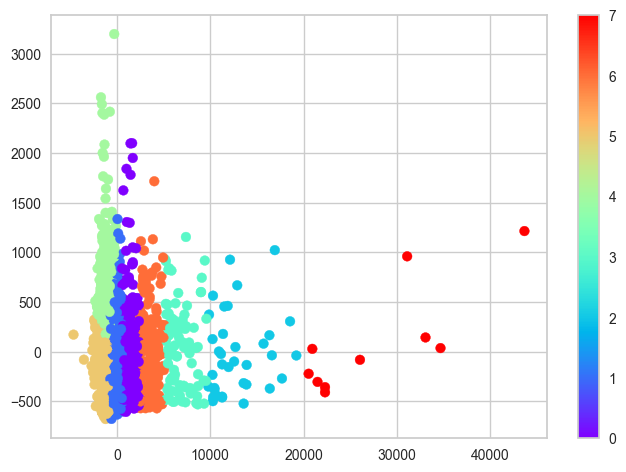

In [264]:
#Scatterplot
#colors = np.random.rand(2896, 3)
#colorsArr = np.array([0,1,2,3,4,5,6,7])
#colorsArr = plt.scatter(pcaX, pcaY, c=colors, vmin=0, vmax=256)#plt.scatter(pcaX, pcaY, c=c)
colorsArr = plt.scatter(pcaX, pcaY, c=c, cmap='rainbow')
plt.colorbar(colorsArr)
plt.show()

In [265]:
df_encoded_new.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [266]:
df_filtered.describe()

,age,balance,day,duration,campaign,cluster
count,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000
mean,39.844959,1588.495856,15.827003,682.958564,2.414365,3.404696
std,11.001984,2924.894429,8.557604,431.287174,2.306015,2.026908
min,19.000000,-3058.000000,1.000000,8.000000,1.000000,0.000000
25%,31.000000,141.000000,8.000000,364.000000,1.000000,1.000000
50%,37.000000,620.000000,16.000000,629.000000,2.000000,4.000000
75%,47.000000,1820.500000,22.000000,913.000000,3.000000,5.000000
max,95.000000,45248.000000,31.000000,3881.000000,32.000000,7.000000


In [267]:
cluster_0 = df_filtered.loc[df_filtered['cluster'] == 0]
cluster_0.describe()

,age,balance,day,duration,campaign,cluster
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.0
mean,42.368732,2964.622419,16.064897,639.368732,2.318584,0.0
std,12.375165,523.753854,8.490261,459.348422,2.242405,0.0
min,21.000000,2146.000000,1.000000,69.000000,1.000000,0.0
25%,32.000000,2507.500000,8.000000,270.000000,1.000000,0.0
50%,40.000000,2910.000000,17.000000,583.000000,2.000000,0.0
75%,52.000000,3399.500000,21.000000,864.000000,3.000000,0.0
max,95.000000,4004.000000,31.000000,2770.000000,17.000000,0.0


In [268]:
cluster_1 = df_filtered.loc[df_filtered['cluster'] == 1]
cluster_1.describe()

,age,balance,day,duration,campaign,cluster
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.0
mean,40.275042,1352.120543,15.680815,598.818336,2.351443,1.0
std,10.473277,379.205858,8.832338,351.561738,2.080952,0.0
min,20.000000,759.000000,1.000000,8.000000,1.000000,1.0
25%,33.000000,1015.000000,8.000000,310.000000,1.000000,1.0
50%,38.000000,1304.000000,15.000000,558.000000,2.000000,1.0
75%,46.000000,1628.000000,22.000000,813.000000,3.000000,1.0
max,83.000000,2160.000000,31.000000,2016.000000,16.000000,1.0


In [269]:
cluster_2 = df_filtered.loc[df_filtered['cluster'] == 2]
cluster_2.describe()

,age,balance,day,duration,campaign,cluster
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.0
mean,41.250000,14316.111111,16.083333,570.277778,3.027778,2.0
std,13.538042,2706.078499,7.853571,406.218492,3.451593,0.0
min,26.000000,11385.000000,2.000000,74.000000,1.000000,2.0
25%,31.000000,12095.250000,10.250000,247.250000,1.000000,2.0
50%,39.000000,13277.000000,18.000000,493.500000,2.000000,2.0
75%,47.250000,15465.500000,21.000000,756.000000,3.000000,2.0
max,85.000000,20806.000000,30.000000,1598.000000,17.000000,2.0


In [270]:
cluster_3 = df_filtered.loc[df_filtered['cluster'] == 3]
cluster_3.describe()

,age,balance,day,duration,campaign,cluster
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.0
mean,44.367816,8414.632184,16.321839,688.149425,2.252874,3.0
std,13.246426,1288.921770,8.319904,420.112181,1.760143,0.0
min,25.000000,6748.000000,2.000000,97.000000,1.000000,3.0
25%,33.000000,7284.500000,10.000000,298.500000,1.000000,3.0
50%,43.000000,8089.000000,18.000000,675.000000,2.000000,3.0
75%,52.500000,9347.500000,21.000000,941.000000,3.000000,3.0
max,85.000000,11174.000000,31.000000,1790.000000,9.000000,3.0


In [271]:
cluster_4 = df_filtered.loc[df_filtered['cluster'] == 4]
cluster_4.describe()

,age,balance,day,duration,campaign,cluster
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.0
mean,39.075000,351.147917,15.302083,1268.231250,2.789583,4.0
std,9.366723,364.793357,8.238004,388.782569,2.679758,0.0
min,23.000000,-725.000000,1.000000,815.000000,1.000000,4.0
25%,32.000000,53.500000,8.000000,1021.500000,1.000000,4.0
50%,37.000000,309.000000,15.000000,1161.500000,2.000000,4.0
75%,46.000000,621.250000,21.000000,1391.500000,3.000000,4.0
max,64.000000,1495.000000,31.000000,3881.000000,29.000000,4.0


In [272]:
cluster_5 = df_filtered.loc[df_filtered['cluster'] == 5]
cluster_5.describe()

,age,balance,day,duration,campaign,cluster
count,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.0
mean,38.657360,178.373942,15.937394,510.079526,2.323181,5.0
std,10.997892,316.000816,8.635108,230.656135,2.264205,0.0
min,19.000000,-3058.000000,1.000000,11.000000,1.000000,5.0
25%,30.000000,2.000000,8.000000,320.250000,1.000000,5.0
50%,36.000000,157.500000,16.000000,532.500000,2.000000,5.0
75%,45.000000,377.000000,22.000000,686.000000,3.000000,5.0
max,90.000000,779.000000,31.000000,1039.000000,32.000000,5.0


In [273]:
cluster_6 = df_filtered.loc[df_filtered['cluster'] == 6]
cluster_6.describe()

,age,balance,day,duration,campaign,cluster
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.0
mean,41.202312,5087.306358,16.213873,637.208092,2.323699,6.0
std,10.758966,701.062627,8.331464,421.014448,2.121146,0.0
min,23.000000,4031.000000,1.000000,84.000000,1.000000,6.0
25%,32.000000,4461.000000,10.000000,316.000000,1.000000,6.0
50%,38.000000,5060.000000,17.000000,545.000000,2.000000,6.0
75%,49.000000,5637.000000,21.000000,878.000000,3.000000,6.0
max,77.000000,6657.000000,31.000000,2372.000000,21.000000,6.0


In [274]:
cluster_7 = df_filtered.loc[df_filtered['cluster'] == 7]
cluster_7.describe()

,age,balance,day,duration,campaign,cluster
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.0
mean,38.400000,29193.200000,16.600000,609.700000,2.900000,7.0
std,12.755827,7748.729155,10.112698,515.348437,3.247221,0.0
min,24.000000,22125.000000,2.000000,133.000000,1.000000,7.0
25%,29.750000,23276.500000,7.750000,265.000000,1.000000,7.0
50%,35.500000,25751.000000,19.500000,469.000000,1.500000,7.0
75%,46.500000,34155.750000,24.750000,608.250000,2.000000,7.0
max,61.000000,45248.000000,30.000000,1623.000000,9.000000,7.0


In [ ]:
age balance day duration campaign cluster
42.368732 	2964.622419 	16.064897 	639.368732 	2.318584 	0.0
40.275042 	1352.120543 	15.680815 	598.818336 	2.351443 	1.0
41.250000 	14316.111111 	16.083333 	570.277778 	3.027778 	2.0
44.367816 	8414.632184 	16.321839 	688.149425 	2.252874 	3.0
39.075000 	351.147917 	15.302083 	1268.231250 	2.789583 	4.0
38.657360 	178.373942 	15.937394 	510.079526 	2.323181 	5.0
41.202312 	5087.306358 	16.213873 	637.208092 	2.323699 	6.0
38.400000 	29193.200000 	16.600000 	609.700000 	2.900000 	7.0